<a href="https://colab.research.google.com/github/Erajjamil137/Data-preprocessing/blob/main/outlierdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Seed for reproducibility
np.random.seed(42)

# Generate data
data_values = np.random.normal(loc=50, scale=10, size=100).tolist()
# Introduce outliers manually
data_values[5] = 100
data_values[20] = 120
data_values[80] = -20

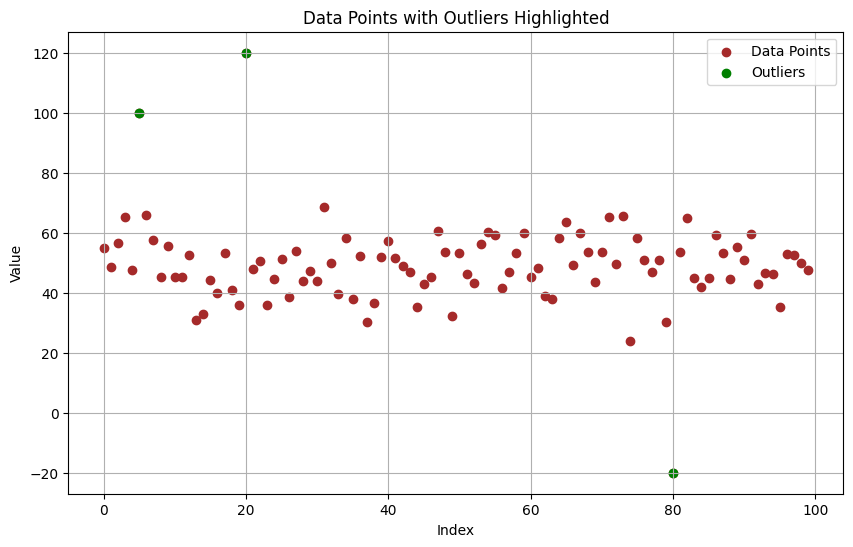

In [14]:
# Create DataFrame
df = pd.DataFrame({'Value': data_values})

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Value'], color='brown', label='Data Points')
plt.scatter(df[df['Value'].isin([100, 120, -20])].index, [100, 120, -20], color='green', label='Outliers')
plt.title('Data Points with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


In [8]:
# Z-Score Method
df['z_score'] = zscore(df['Value'])
z_outliers = df[(df['z_score'] < -3) | (df['z_score'] > 3)]
print("Outliers detected using Z-Score:")
print(z_outliers)

Outliers detected using Z-Score:
    Value   z_score
5   100.0  3.553592
20  120.0  4.957073
80  -20.0 -4.867300


In [9]:
# IQR Method
Q1, Q3 = df['Value'].quantile([0.25, 0.75])
#formula
IQR = Q3 - Q1

lower_limit, upper_limit = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
iqr_outliers = df[(df['Value'] < lower_limit) | (df['Value'] > upper_limit)]
print("\nOutliers detected using IQR:")
print(iqr_outliers)


Outliers detected using IQR:
         Value   z_score
5   100.000000  3.553592
20  120.000000  4.957073
74   23.802549 -1.793496
80  -20.000000 -4.867300


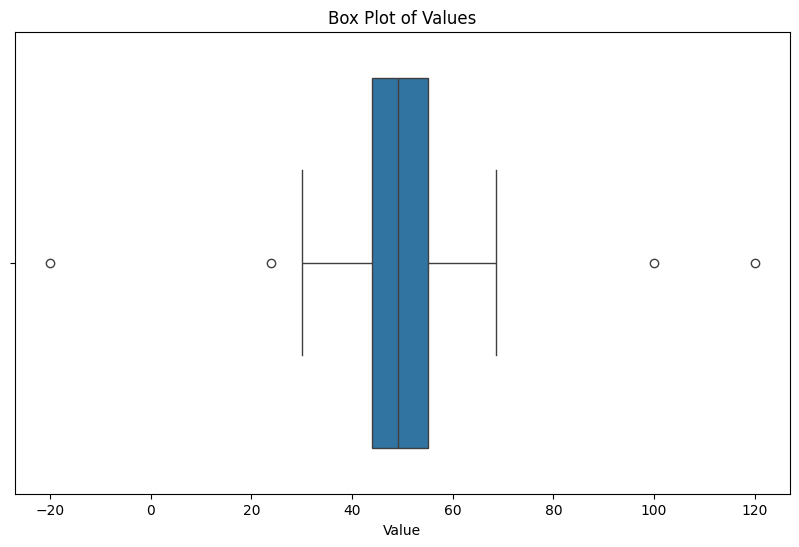

In [10]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Value')
plt.title('Box Plot of Values')
plt.show()

In [11]:
# Clustering with DBSCAN
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Value']])

dbscan_model = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan_model.fit_predict(scaled_data)
df['Cluster'] = dbscan_labels

cluster_outliers = df[df['Cluster'] == -1]
print("\nOutliers detected using DBSCAN:")
print(cluster_outliers)


Outliers detected using DBSCAN:
    Value   z_score  Cluster
5   100.0  3.553592       -1
20  120.0  4.957073       -1
80  -20.0 -4.867300       -1


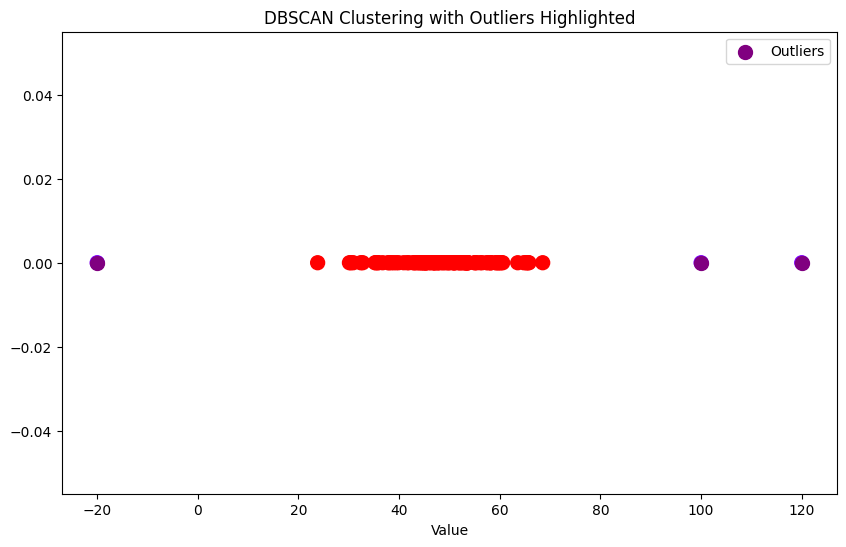

In [13]:
# DBSCAN Clustering Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Value'], np.zeros(len(df)), c=df['Cluster'], cmap='rainbow', s=100)
plt.scatter(cluster_outliers['Value'], np.zeros(len(cluster_outliers)), color='purple', s=100, label='Outliers')
plt.title('DBSCAN Clustering with Outliers Highlighted')
plt.xlabel('Value')
plt.legend()
plt.show()